You are given a 2D integer matrix grid of size n x m, where each element is either 0, 1, or 2.

A V-shaped diagonal segment is defined as:

    The segment starts with 1.
    The subsequent elements follow this infinite sequence: 2, 0, 2, 0, ....
    The segment:
        Starts along a diagonal direction (top-left to bottom-right, bottom-right to top-left, top-right to bottom-left, or bottom-left to top-right).
        Continues the sequence in the same diagonal direction.
        Makes at most one clockwise 90-degree turn to another diagonal direction while maintaining the sequence.

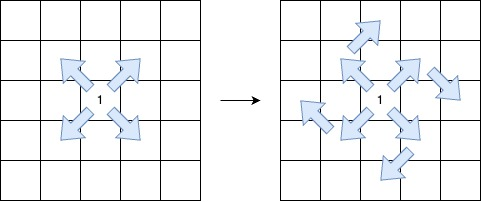

Return the length of the longest V-shaped diagonal segment. If no valid segment exists, return 0.

 

Example 1:

Input: grid = [[2,2,1,2,2],[2,0,2,2,0],[2,0,1,1,0],[1,0,2,2,2],[2,0,0,2,2]]

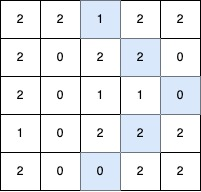

Output: 5

Explanation:

The longest V-shaped diagonal segment has a length of 5 and follows these coordinates: (0,2) → (1,3) → (2,4), takes a 90-degree clockwise turn at (2,4), and continues as (3,3) → (4,2).

Example 2:

Input: grid = [[2,2,2,2,2],[2,0,2,2,0],[2,0,1,1,0],[1,0,2,2,2],[2,0,0,2,2]]

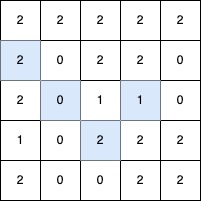

Output: 4

Explanation:

The longest V-shaped diagonal segment has a length of 4 and follows these coordinates: (2,3) → (3,2), takes a 90-degree clockwise turn at (3,2), and continues as (2,1) → (1,0).

Example 3:

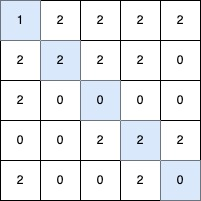

Input: grid = [[1,2,2,2,2],[2,2,2,2,0],[2,0,0,0,0],[0,0,2,2,2],[2,0,0,2,0]]

Output: 5

Explanation:

The longest V-shaped diagonal segment has a length of 5 and follows these coordinates: (0,0) → (1,1) → (2,2) → (3,3) → (4,4).

Example 4:

Input: grid = [[1]]

Output: 1

Explanation:

The longest V-shaped diagonal segment has a length of 1 and follows these coordinates: (0,0).

 

Constraints:

    n == grid.length
    m == grid[i].length
    1 <= n, m <= 500
    grid[i][j] is either 0, 1 or 2.



In [ ]:
class Solution:
    def lenOfVDiagonal(self, grid: List[List[int]]) -> int:
        DIRS = [(1, 1), (1, -1), (-1, -1), (-1, 1)]
        m, n = len(grid), len(grid[0])

        @cache
        def dp(i, j, direction, can_turn, nxt_val):
            n_i, n_j = i + DIRS[direction][0], j + DIRS[direction][1]
            if not (0 <= n_i < m and 0 <= n_j < n and grid[n_i][n_j] == nxt_val):
                return 0
            
            res = dp(n_i, n_j, direction, can_turn, 2 - nxt_val)
            if can_turn:
                res = max(res, dp(n_i, n_j, (direction + 1) % 4, False, 2 - nxt_val))
            return 1 + res

        ans = 0
        for i in range(m):
            for j in range(n):
                if grid[i][j] == 1:
                    for direction in range(4):
                        ans = max(ans, 1 + dp(i, j, direction, True, 2))
        return ans